# Simulating imbalanced datasets

Simulating imbalanced dataset can be done using two approaches. First using the make_classification function from [sample_generator.py](https://github.com/scikit-learn/scikit-learn/blob/a24c8b46/sklearn/datasets/samples_generator.py), currently available through sklearn.datasets. Second, using the [make_imbalance](http://contrib.scikit-learn.org/imbalanced-learn/stable/generated/imblearn.datasets.make_imbalance.html) function from imblearn.datasets to introduced imbalance in balanced datasets. 

## make_classification

The make_classification function can be used to create imbalanced datasets by using the weights parameter to define the ratio of each class.

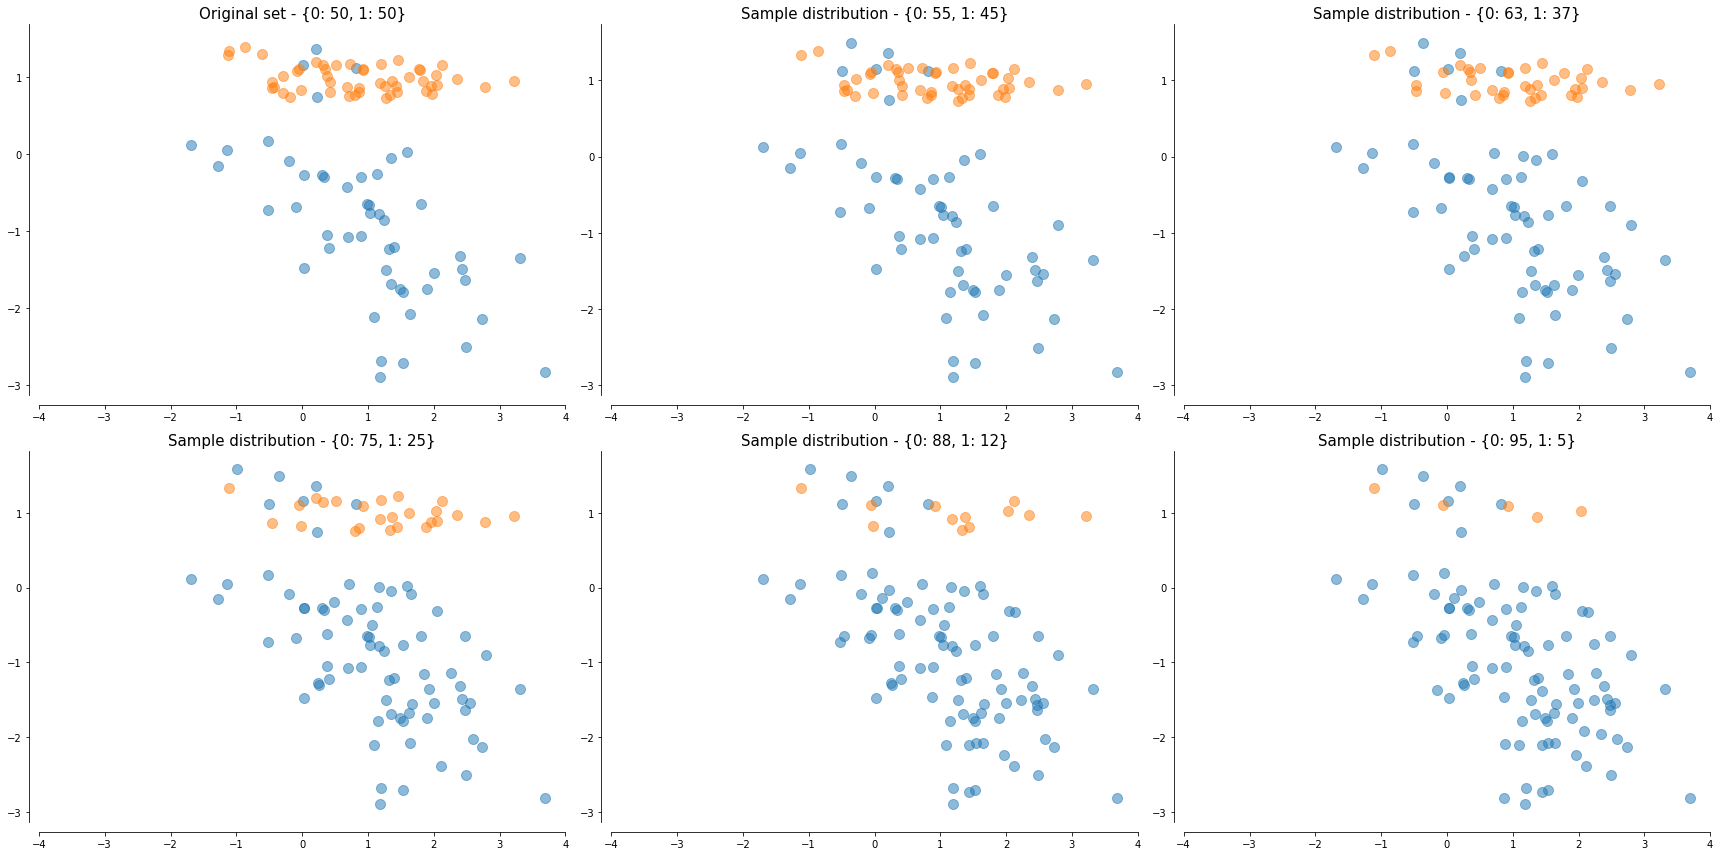

In [1]:
from collections import Counter

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

def plot_decoration(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-4, 4])

seed = 0

# Generate the dataset
X, y = make_classification(n_samples=100,  n_features=2,
                            n_informative=2, n_redundant=0,
                            n_classes=2, n_clusters_per_class=1,
                           random_state=seed)

# Two subplots, unpack the axes array immediately
f, axs = plt.subplots(2, 3, figsize=(24, 12))

axs = [a for ax in axs for a in ax]

axs[0].scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, s=100)
axs[0].scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, s=100)
axs[0].set_title('Original set - {}'.format(dict(Counter(y))), fontsize=15)
plot_decoration(axs[0])

multipliers = [0.9, 0.75, 0.5, 0.25, 0.1]
for i, multiplier in enumerate(multipliers, start=1):
    ax = axs[i]
    min_class = 50 * multiplier

    # Generate the dataset
    X_, y_ = make_classification(n_samples=100,  n_features=2,
                            n_informative=2, n_redundant=0,
                            n_classes=2, n_clusters_per_class=1,
                            weights=[(100-min_class)/100, min_class/100], random_state=seed)

    ax.scatter(X_[y_ == 0, 0], X_[y_ == 0, 1], label="Class #0", alpha=0.5, s=100)
    ax.scatter(X_[y_ == 1, 0], X_[y_ == 1, 1], label="Class #1", alpha=0.5, s=100)
    ax.set_title('Sample distribution - {}'.format(dict(Counter(y_))), fontsize=15)
    plot_decoration(ax)

plt.tight_layout()
plt.show()

## make_imbalance
This function can be used to introduce imbalance in balanced datasets. Using the balanced dataset created above we can introduce imbalance by providing the desired number of samples for the targeted class (minority class) in the form of a dict. This function uses the imblearn.under_sampling.RandomUnderSampler to reduce the size of the minority class. Sample sizes larger than the current size are not accepted.

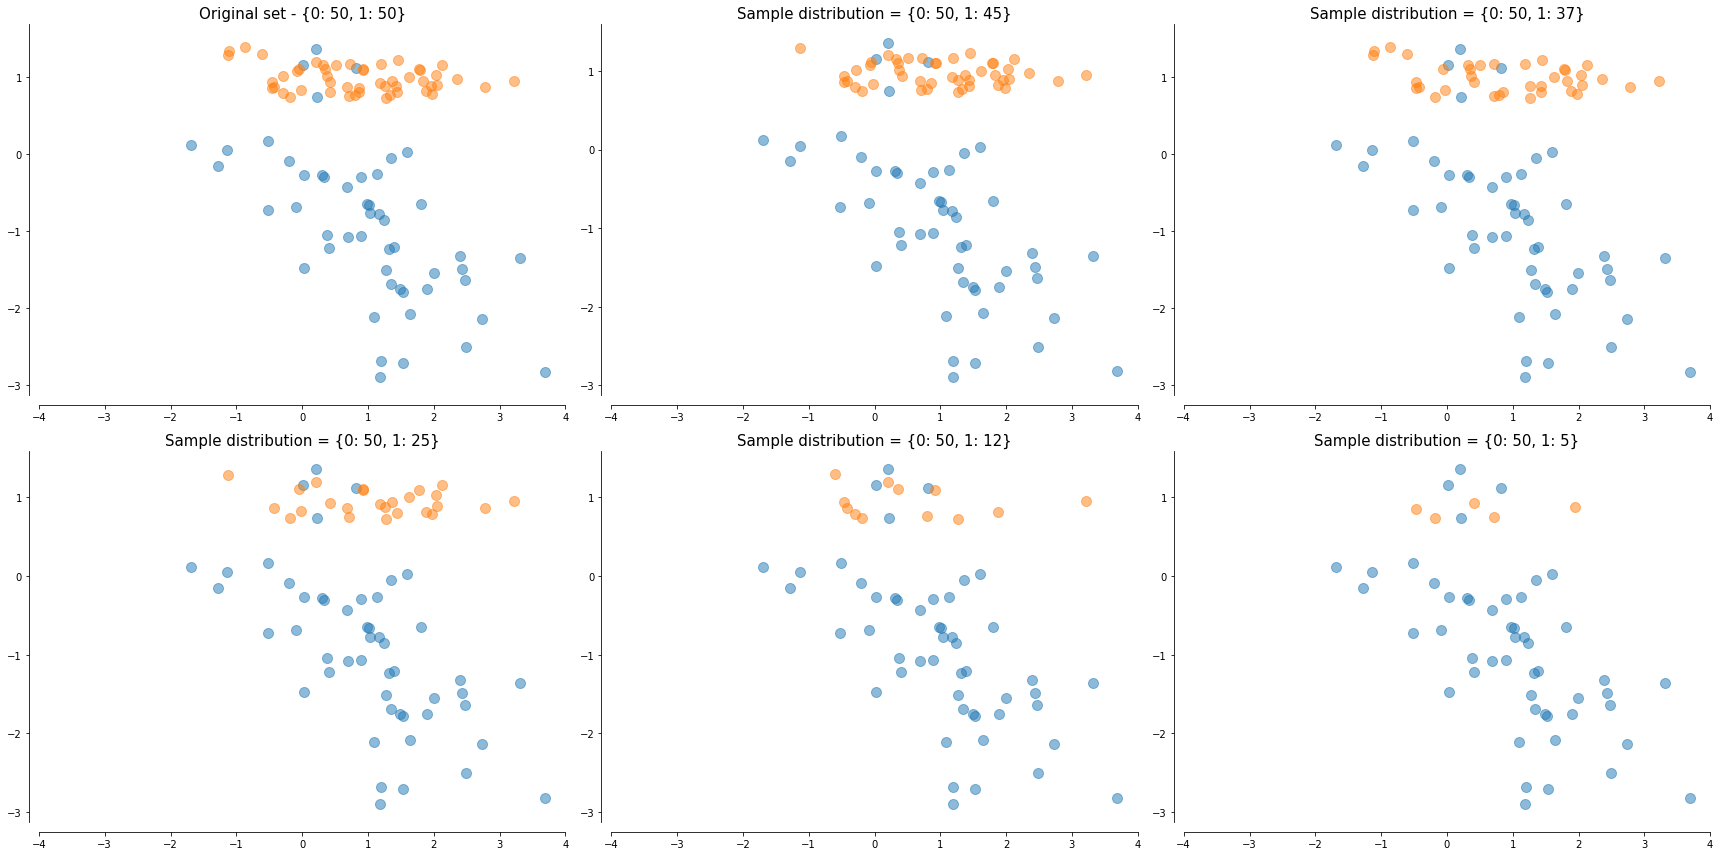

In [2]:
from imblearn.datasets import make_imbalance
# Two subplots,make_imbalancee_imbalancee_imbalancepack the axes array immediately
f, axs = plt.subplots(2, 3, figsize=(24, 12))

axs = [a for ax in axs for a in ax]

axs[0].scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, s=100)
axs[0].scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, s=100)
axs[0].set_title('Original set - {}'.format(dict(Counter(y))), fontsize=15)
plot_decoration(axs[0])


def ratio_func(y, multiplier, minority_class):
    target_stats = Counter(y)
    return {minority_class: int(multiplier * target_stats[minority_class])}


multipliers = [0.9, 0.75, 0.5, 0.25, 0.1]
for i, multiplier in enumerate(multipliers, start=1):
    ax = axs[i]

    X_, y_ = make_imbalance(X, y, ratio=ratio_func,
                            **{"multiplier": multiplier,
                               "minority_class": 1})
    ax.scatter(X_[y_ == 0, 0], X_[y_ == 0, 1], label="Class #0", alpha=0.5, s=100)
    ax.scatter(X_[y_ == 1, 0], X_[y_ == 1, 1], label="Class #1", alpha=0.5, s=100)
    ax.set_title('Sample distribution = {}'.format(dict(Counter(y_))), fontsize=15)
    plot_decoration(ax)

plt.tight_layout()
plt.show()

In [3]:
print('Original n=' + str(len(X)))
print('Adjusted n=' + str(len(X_)))

Original n=100
Adjusted n=55


It seems that the make_imbalance function by using under-sampling to generate the imbalanced dataset, results to a reduced dataset.

```py

rus = RandomUnderSampler(ratio=ratio_, replacement=False,
                             random_state=random_state)
```
